In [1]:
import numpy as np

from linear_regression import LinearRegression as MyLinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso

import metrics
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
RANDOM_STATE = 42

Сгенерируем данные для регрессии:

In [3]:
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(
    n_samples=n_samples, n_features=1,
    n_informative=1, noise=10,
    coef=True, random_state=RANDOM_STATE
)

# Add outlier data
np.random.seed(RANDOM_STATE)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

Разобьем данные на тренировочную и обучающую выборки:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=RANDOM_STATE
)

In [5]:
X_train.shape

(670, 1)

Посмотрим на данные:

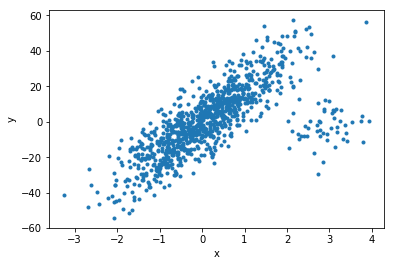

In [6]:
plt.plot(X, y, ".");
plt.xlabel("x");
plt.ylabel("y");

Обучим линейную модель и обучим ее на тренировочных данных:Ъ

In [7]:
linear_regression_model = LinearRegression()

linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Сделаем предикт на тестовых данных:

In [8]:
y_hat = linear_regression_model.predict(X_test)

Посмотрим на значения метрик:

In [9]:
print("MAE:", mean_absolute_error(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat))
print("R^2 score:", r2_score(y_test, y_hat))

MAE: 9.940362029807723
MSE: 173.1929838913916
R^2 score: 0.47263462857304817


Посмотрим на веса обученной модели:

In [10]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[11.3272569]
-1.3555932515073648


Визуализируем:

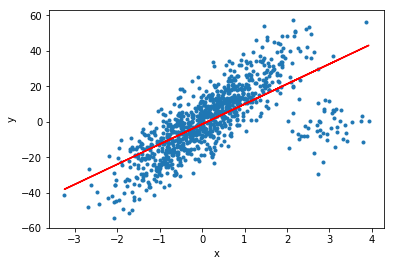

In [11]:
plt.plot(X, y, ".");
plt.plot(X, X * linear_regression_model.coef_ + linear_regression_model.intercept_, "r")
plt.xlabel("x");
plt.ylabel("y");

---

In [12]:
# TODO: выполните то же самое с написанной вами моделью:
# 1. обучите ее на (X_train, y_train)
#   * попробуйте обучать с регуляризацией и без
#   * пробуйте различные гиперпараметры (шаг градиента, коэффицент регуляризации)
# 2. оцените кач-во на X_test, используя все написанные вами метрики
# 3. сравните значения метрик с значениями метрик из sklearn.metrics
# 4. визуализируйте y = k * x + b, где k и b -- bias и вес вашей модели

In [13]:
model = MyLinearRegression(lambda_coef=0.5, regularization='L2')

In [14]:
model.fit(X_train, y_train)

In [15]:
model.get_weights()

array([-1.35342007, 11.32069151])

In [16]:
y_hat = model.predict(X_test)

In [17]:
print("MAE:", mean_absolute_error(y_test, y_hat), metrics.mae(y_test, y_hat))
print("MSE:", mean_squared_error(y_test, y_hat), metrics.mse(y_test, y_hat))
print("R^2 score:", sklearn.metrics.r2_score(y_test, y_hat), metrics.r2_score(y_test, y_hat))

MAE: 9.941441038820242 9.941441038820242
MSE: 173.18644860094665 173.18644860094665
R^2 score: 0.47265452825833254 0.47265452825833265


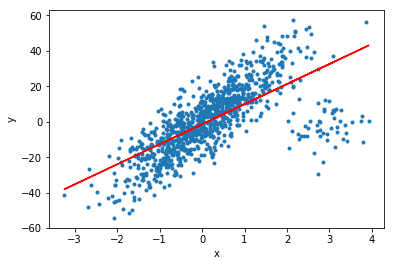

In [18]:
plt.plot(X, y, ".");
plt.plot(X, X * model.get_weights()[1] + model.get_weights()[0], "r")
plt.xlabel("x");
plt.ylabel("y");

In [19]:
models = []
for reg in (None, 'L1', 'L2'):
    for lambda_coef in np.logspace(-2, 0, 5):
        for alpha in np.logspace(-2, 0, 5):
            models.append(MyLinearRegression(lambda_coef=lambda_coef, alpha=alpha, regularization=reg))

In [20]:
for model in models:
    model.fit(X_train, y_train)

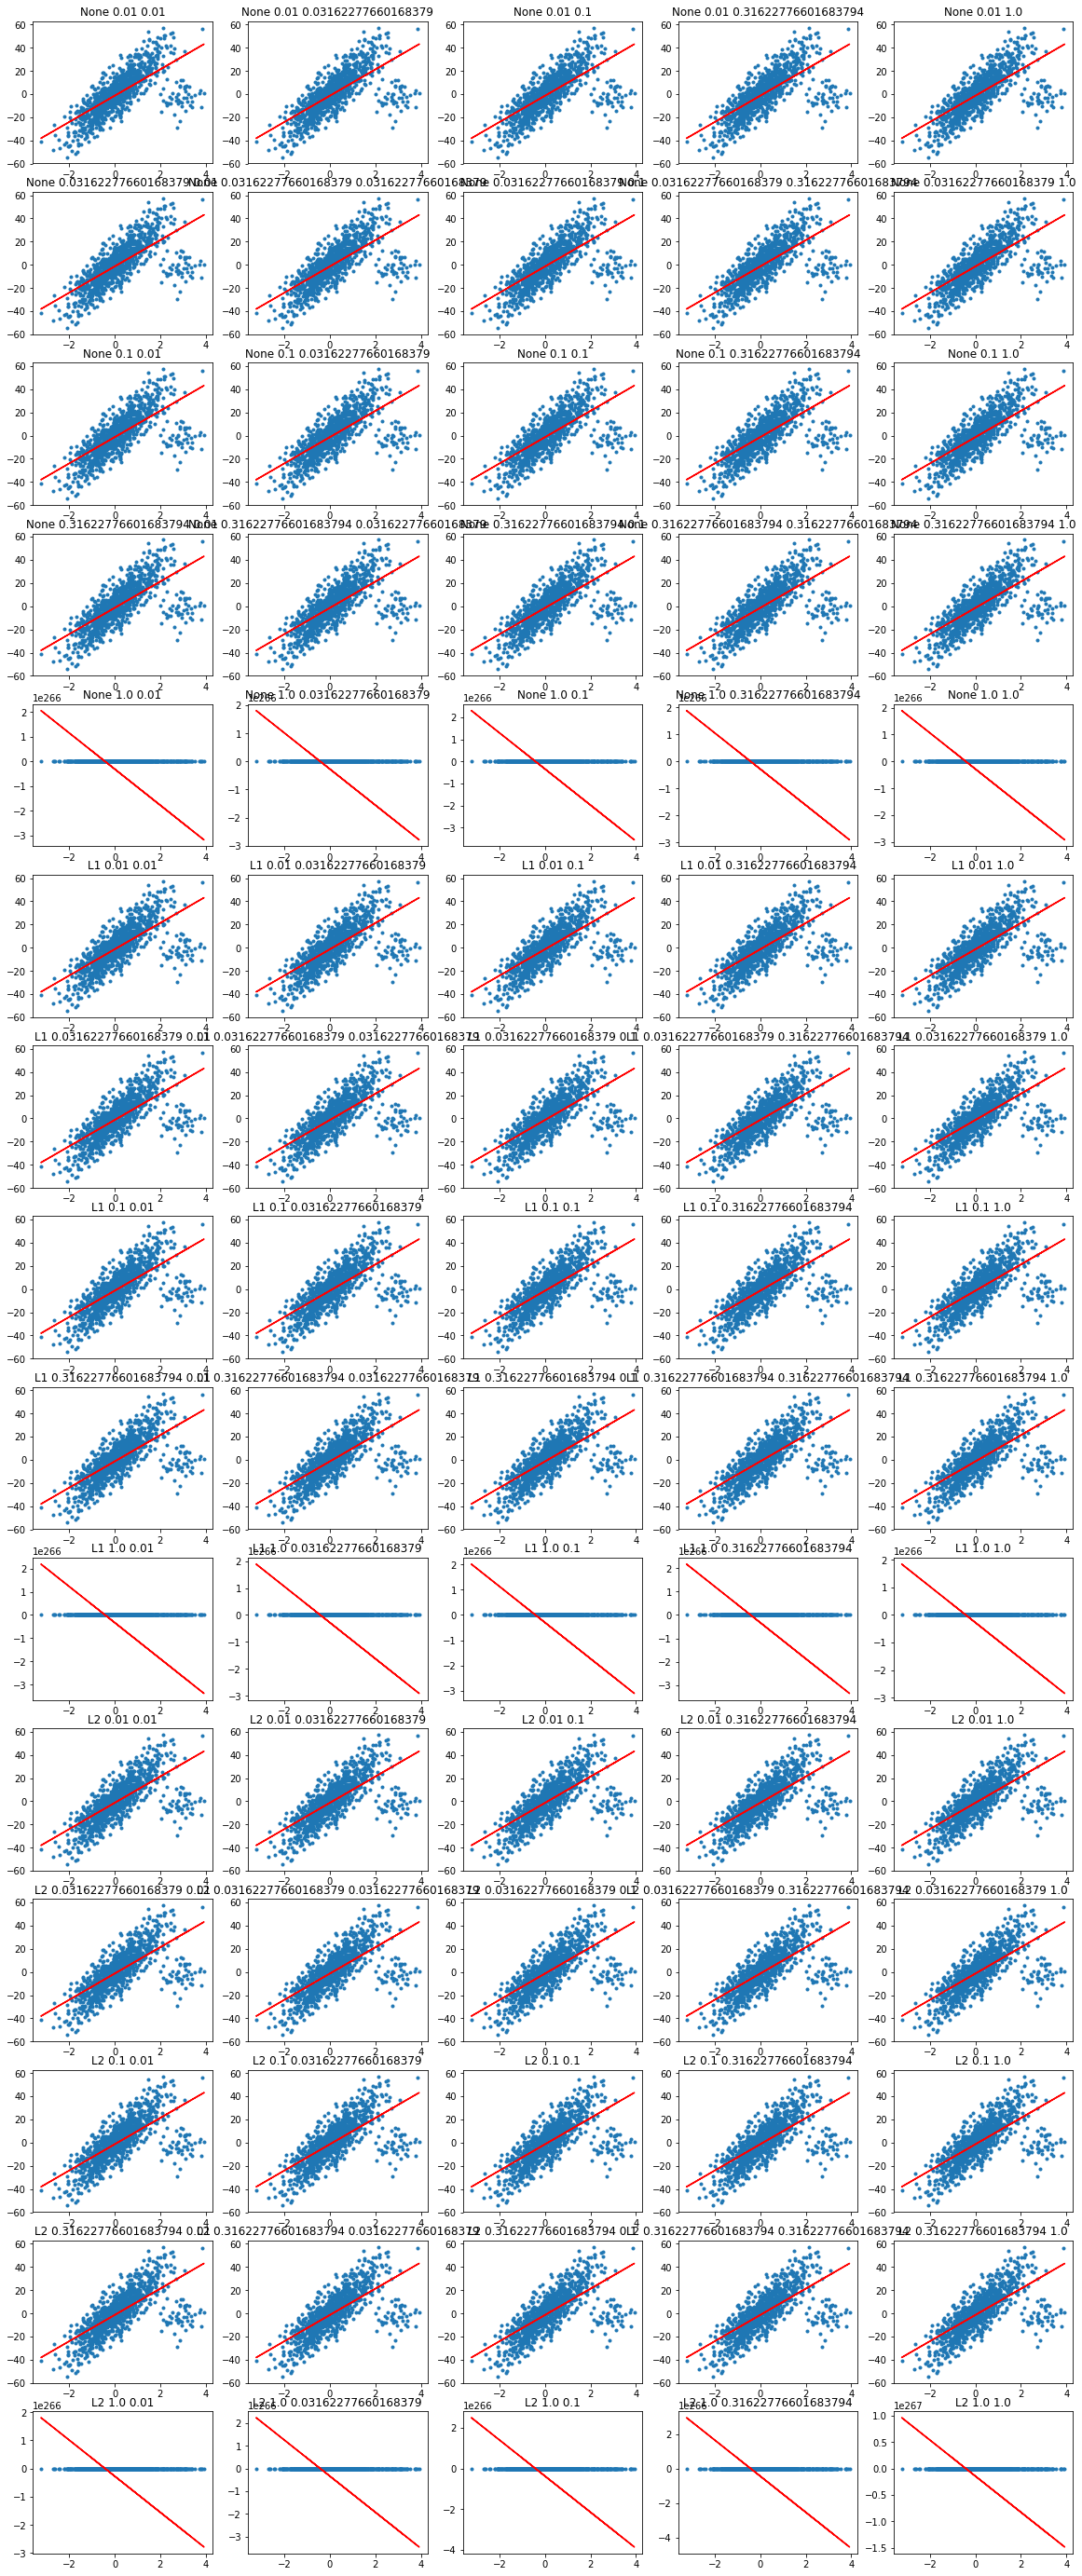

In [26]:
plt.figure(figsize=(20, 50))

for i in range(len(models)):
    plt.subplot(15, 5, i + 1)
    plt.plot(X, y, ".");
    plt.plot(X, X * models[i].get_weights()[1] + models[i].get_weights()[0], "r")
    plt.title(str(models[i].regularization) + " " + str(models[i].lambda_coef) + ' ' + str(models[i].alpha))    

In [22]:
mse_s = []
mae_s = []
r2_s = []
for model in models:
    y_hat = model.predict(X_test)
    mse_s.append(metrics.mse(y_test, y_hat))
    mae_s.append(metrics.mae(y_test,y_hat))
    r2_s.append(metrics.r2_score(y_test, y_hat))

/Users/aapiskotin/Projects/AppliedPythonAtom/homeworks/homework_06_ml/metrics.py:15: RuntimeWarning: overflow encountered in square
  return 1/y_true.shape[0] * np.sum((y_true - y_hat) ** 2)


173.18003622055485
[-1.35125151 11.314134  ]
L2 0.31622776601683794 1.0


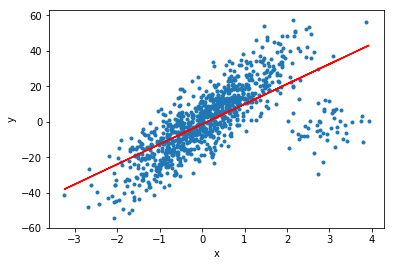

In [27]:
best_mse_model = models[np.array(mse_s).argmin()]
print(min(mse_s))
print(best_mse_model.get_weights())
print(best_mse_model.regularization, best_mse_model.lambda_coef, best_mse_model.alpha)

plt.plot(X, y, ".");
plt.plot(X, X * best_mse_model.get_weights()[1] + best_mse_model.get_weights()[0], "r")
plt.xlabel("x");
plt.ylabel("y");

9.940362029615459
[-1.35125151 11.314134  ]
L2 0.31622776601683794 1.0


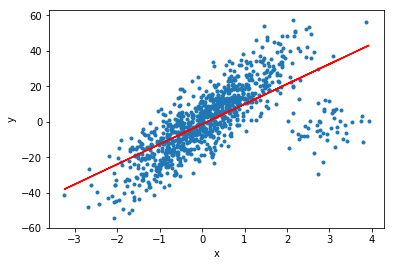

In [28]:
best_mae_model = models[np.array(mse_s).argmin()]
print(min(mae_s))
print(best_mae_model.get_weights())
print(best_mae_model.regularization, best_mae_model.lambda_coef, best_mae_model.alpha)

plt.plot(X, y, ".");
plt.plot(X, X * best_mae_model.get_weights()[1] + best_mae_model.get_weights()[0], "r")
plt.xlabel("x");
plt.ylabel("y");

3.241062963483412e+266
None 1.0 0.01


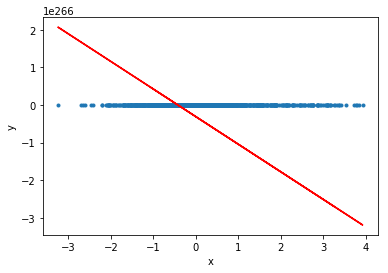

In [25]:
best_r2_model = models[np.array(mse_s).argmax()]
print(max(mae_s))
print(best_r2_model.regularization, best_r2_model.lambda_coef, best_r2_model.alpha)

plt.plot(X, y, ".");
plt.plot(X, X * best_r2_model.get_weights()[1] + best_r2_model.get_weights()[0], "r")
plt.xlabel("x");
plt.ylabel("y");